call option price using arithmatic averaging 5.753923
call option price using geomeric averaging 5.538924


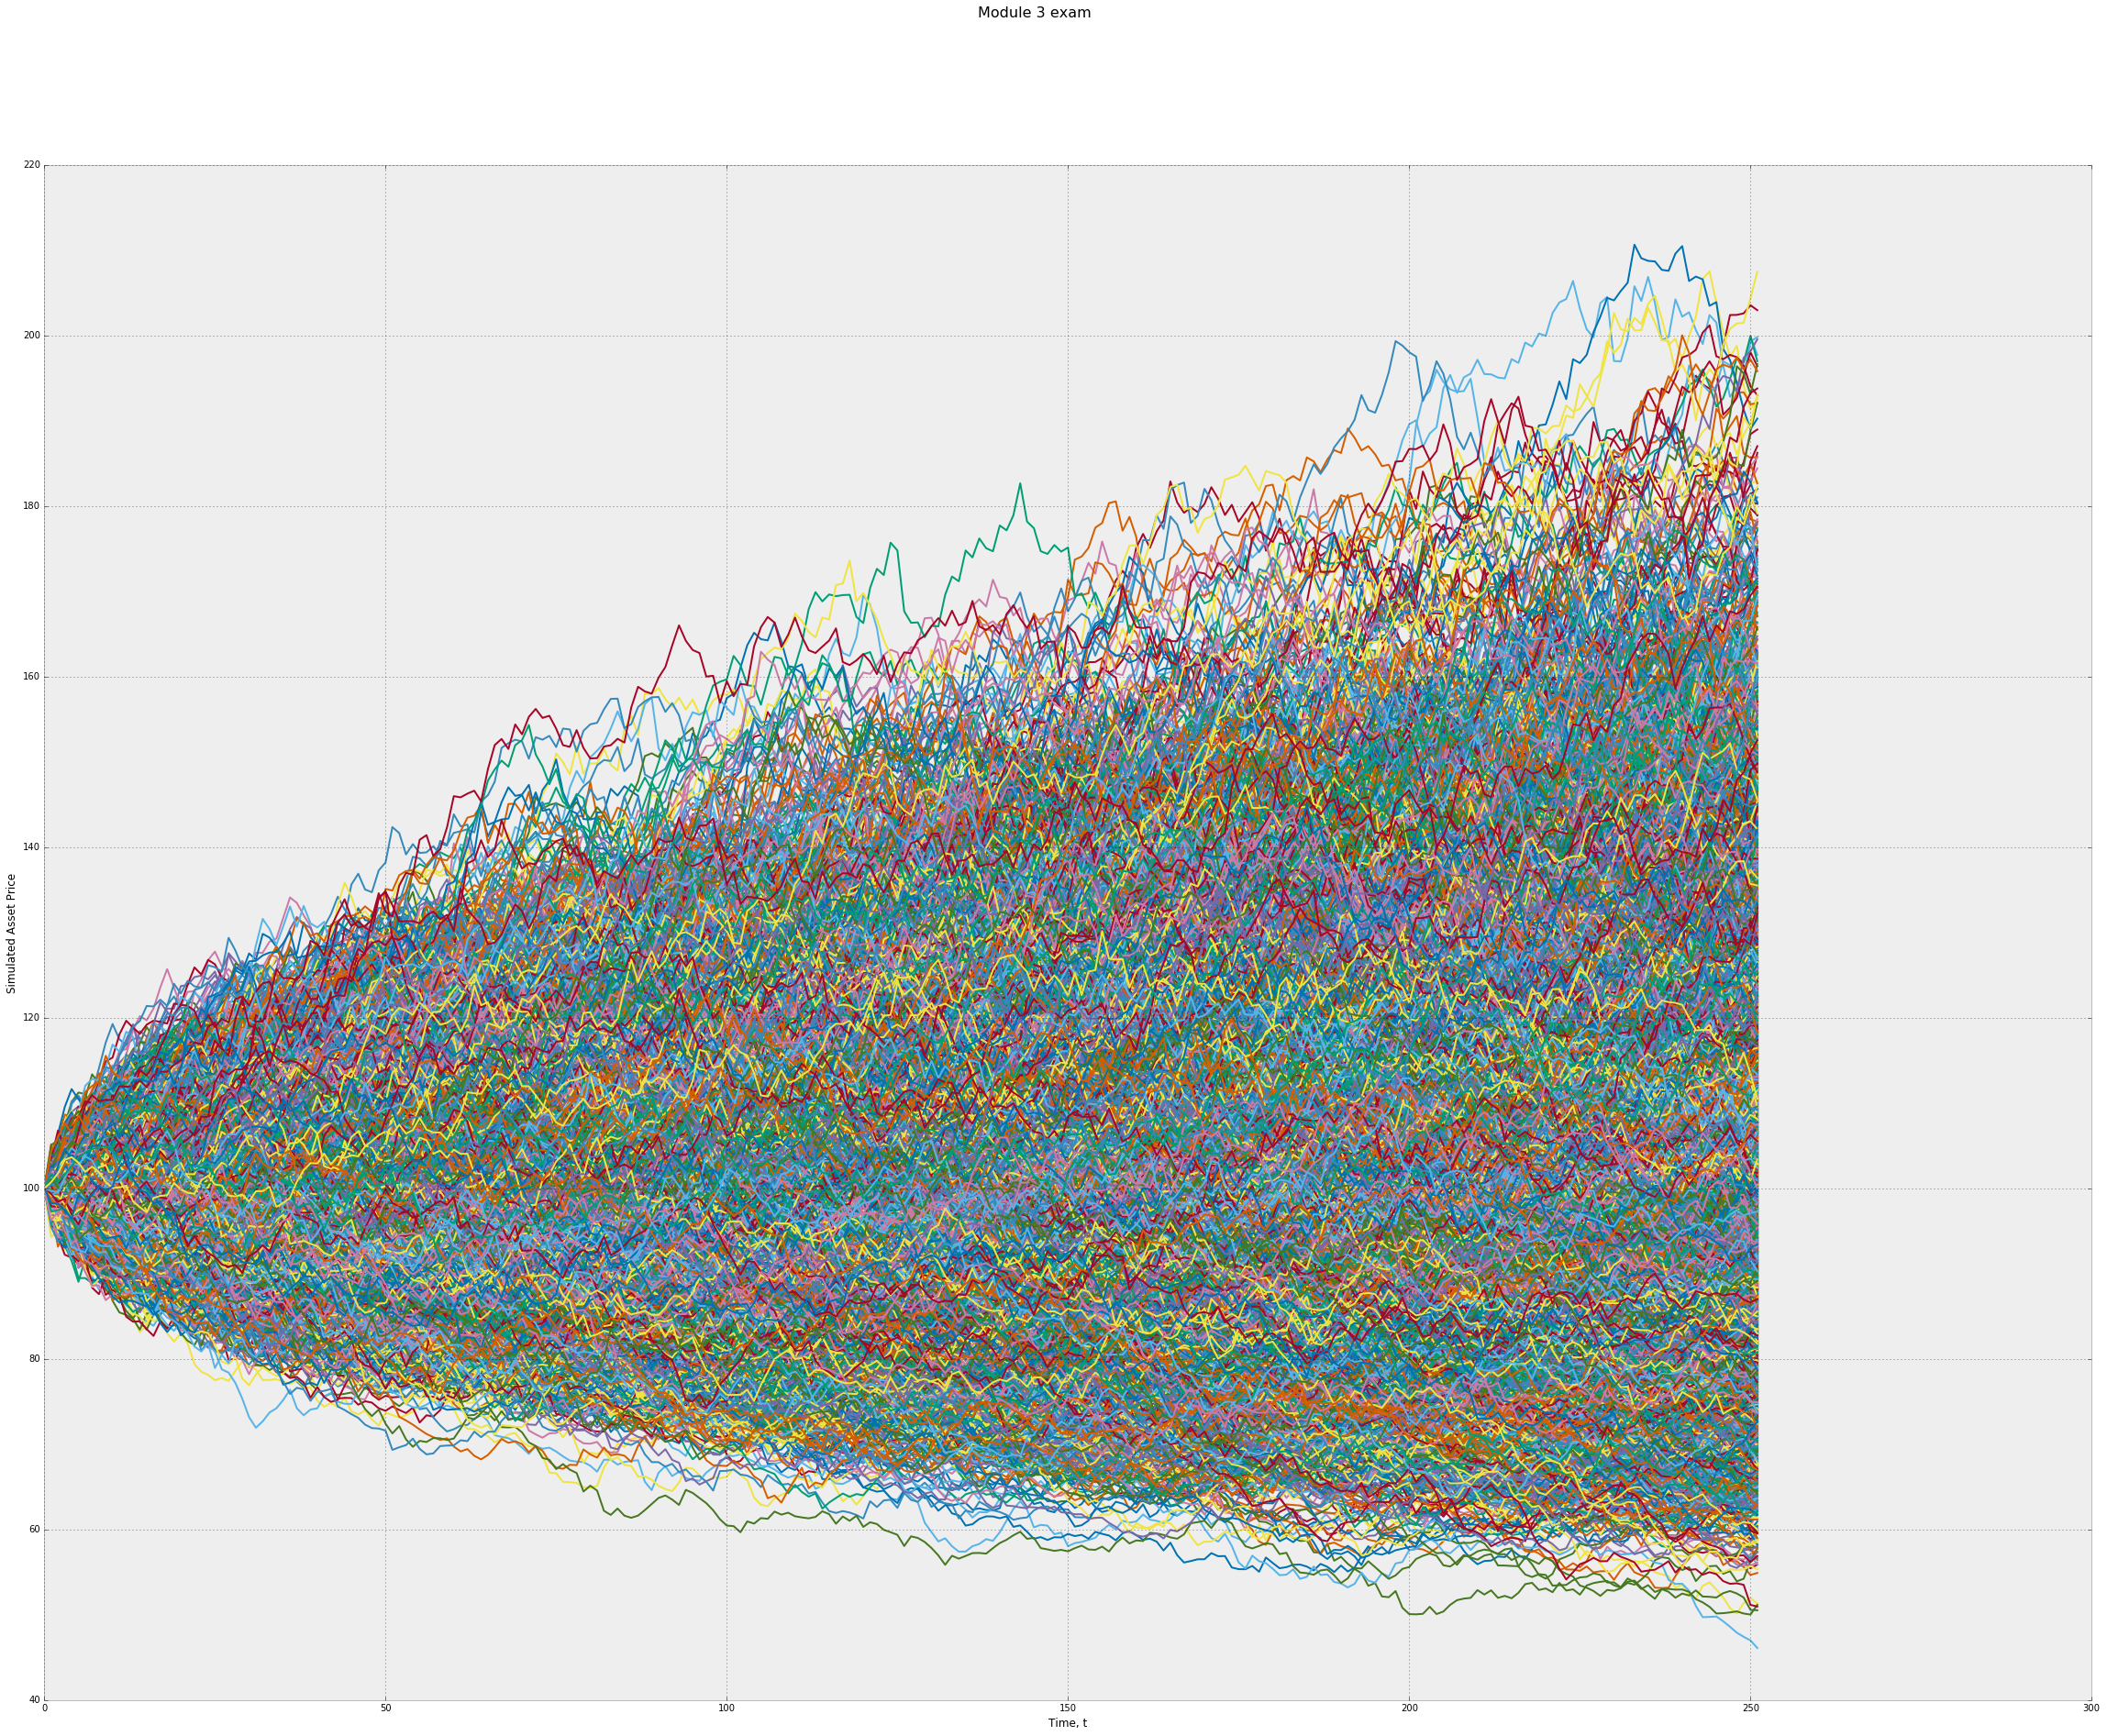

In [206]:
import numpy as np
from numpy.random import randn
from math import sqrt
from functools import reduce
import matplotlib.pylab as plt
%matplotlib inline


current_price = 100
strike_price = 100

number_of_simulations = 10000
one_by_simulations = 1/float(number_of_simulations)
number_of_steps = 252
dt = 1/float(number_of_steps)
discounting_factor = math.exp(-1*interest_rate*1)

volatility = 0.2
interest_rate = 0.05

def geometric_mean(ary):
    gm = 1
    for i in range(number_of_steps):
        gm = gm*(ary[i])**float(1/number_of_steps)
        gm = round(gm*100000)/100000
    return gm


ary1 = np.zeros((number_of_simulations, number_of_steps))
ary2 = np.zeros((number_of_simulations, number_of_steps))

for sim in range(number_of_simulations):
    for step in range(number_of_steps):
        if(step > 0):
            random_number_1 = randn()
            random_number_2 = randn()
            ary1[sim][step] = ary1[sim][step-1]*(1 + interest_rate*dt + volatility*random_number_1*math.sqrt(dt) + (0.5)*volatility*volatility*(random_number_1*random_number_1 -1)*dt)
            ary2[sim][step] = ary2[sim][step-1]*(1 + interest_rate*dt + volatility*random_number_1*math.sqrt(dt) + (0.5)*volatility*volatility*(random_number_1*random_number_1 -1)*dt)

        else:
            ary1[sim][step] = current_price
            ary2[sim][step] = current_price
            
arithmatic_sums_1 = []
arithmatic_sums_2 = []
for i in range(number_of_simulations):
    arithmatic_mean_for_simulation_1 = (reduce(lambda x, y: x+y, ary1[i]))/float(number_of_steps)
    arithmatic_sums_1.append(max(arithmatic_mean_for_simulation_1 - strike_price, 0))
    arithmatic_mean_for_simulation_2 = (reduce(lambda x, y: x+y, ary2[i]))/float(number_of_steps)
    arithmatic_sums_2.append(max(arithmatic_mean_for_simulation_2 - strike_price, 0))
    
    
geometic_average_1 = []
geometic_average_2 = []
for i in range(number_of_simulations):
    geometic_average_1.append(max(geometric_mean(ary1[i]) - strike_price, 0))
    geometic_average_2.append(max(geometric_mean(ary2[i]) - strike_price, 0))
    

arithmatic_total = 0
for i in range(number_of_simulations):
    arithmatic_total = arithmatic_total + 0.5*(arithmatic_sums_1[i]+arithmatic_sums_2[i])*one_by_simulations

geometric_total = 0
for i in range(number_of_simulations):
    geometric_total = geometric_total + 0.5*(geometic_average_1[i]+geometic_average_2[i])*one_by_simulations

arithmatic_total = arithmatic_total*discounting_factor
geometric_total = geometric_total*discounting_factor


print('call option price using arithmatic averaging %f'%arithmatic_total)
print('call option price using geomeric averaging %f'%geometric_total)


plt.style.use(['bmh'])
fig, ax = plt.subplots(1, figsize=(40,30))
fig.suptitle('Module 3 exam', fontsize=16)
ax.set_xlabel('Time, t')
ax.set_ylabel('Simulated Asset Price')
x_axis = numpy.arange(0, number_of_steps, 1)
for i in range(number_of_simulations):
    plt.plot(x_axis, ary1[i])
plt.show()


In [209]:
put_arithmatic_sums_1 = []
put_arithmatic_sums_2 = []
for i in range(number_of_simulations):
    arithmatic_mean_for_simulation_1 = (reduce(lambda x, y: x+y, ary1[i]))/float(number_of_steps)
    put_arithmatic_sums_1.append(max(strike_price - arithmatic_mean_for_simulation_1, 0))
    arithmatic_mean_for_simulation_2 = (reduce(lambda x, y: x+y, ary2[i]))/float(number_of_steps)
    put_arithmatic_sums_2.append(max(strike_price - arithmatic_mean_for_simulation_2, 0))
    
put_geometic_average_1 = []
put_geometic_average_2 = []
for i in range(number_of_simulations):
    put_geometic_average_1.append(max(strike_price - geometric_mean(ary1[i]), 0))
    put_geometic_average_2.append(max(strike_price - geometric_mean(ary2[i]), 0))

put_arithmatic_total = 0
for i in range(number_of_simulations):
    put_arithmatic_total = put_arithmatic_total + 0.5*(put_arithmatic_sums_1[i]+put_arithmatic_sums_2[i])*one_by_simulations

put_geometric_total = 0
for i in range(number_of_simulations):
    put_geometric_total = put_geometric_total + 0.5*(put_geometic_average_1[i]+put_geometic_average_2[i])*one_by_simulations

put_arithmatic_total = put_arithmatic_total*discounting_factor
put_geometric_total = put_geometric_total*discounting_factor

print('put option price using arithmatic averaging %f'%put_arithmatic_total)
print('put option price using geomeric averaging %f'%put_geometric_total)

put option price using arithmatic averaging 3.353030
put option price using geomeric averaging 3.469512
